In [1]:
%load_ext autoreload
%autoreload 2

import warnings

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import seaborn.objects as so

import tenforty

%matplotlib inline

In [3]:
def save_seaborn_objects_plot(plot, filename):
    """Apply common theme elements and work around s.o cutting off legends.

    https://github.com/mwaskom/seaborn/issues/3057
    """
    (
        plot.theme({"font.sans-serif": "Roboto"})
        .layout(engine="tight")
        .save(filename, bbox_inches="tight")
    )

In [4]:
tenforty.evaluate_return(
    w2_income=100_000, state="CA", filing_status="Married/Joint", num_dependents=2
).model_dump()

{'total_tax': 9663.0,
 'federal_adjusted_gross_income': 100000.0,
 'federal_effective_tax_rate': 11.4,
 'federal_tax_bracket': 12.0,
 'federal_taxable_income': 72300.0,
 'federal_amt': 0.0,
 'federal_total_tax': 8239.0,
 'state_adjusted_gross_income': 100000.0,
 'state_taxable_income': 89274.0,
 'state_total_tax': 1424.0,
 'state_tax_bracket': 6.0,
 'state_effective_tax_rate': 2.9}

In [5]:
print(
    tenforty.evaluate_returns(
        w2_income=list(range(50_000, 250_001, 50_000)),
        state="CA",
        filing_status="Married/Joint",
        num_dependents=2,
    )[
        [
            "w2_income",
            "federal_effective_tax_rate",
            "federal_tax_bracket",
            "state_effective_tax_rate",
            "state_tax_bracket",
        ]
    ]
)

   w2_income  federal_effective_tax_rate  federal_tax_bracket  \
0      50000                        10.0                 12.0   
1     100000                        11.4                 12.0   
2     150000                        14.3                 22.0   
3     200000                        16.6                 22.0   
4     250000                        18.1                 24.0   

   state_effective_tax_rate  state_tax_bracket  
0                       1.5                2.0  
1                       2.9                6.0  
2                       4.5                9.3  
3                       5.8                9.3  
4                       6.5                9.3  


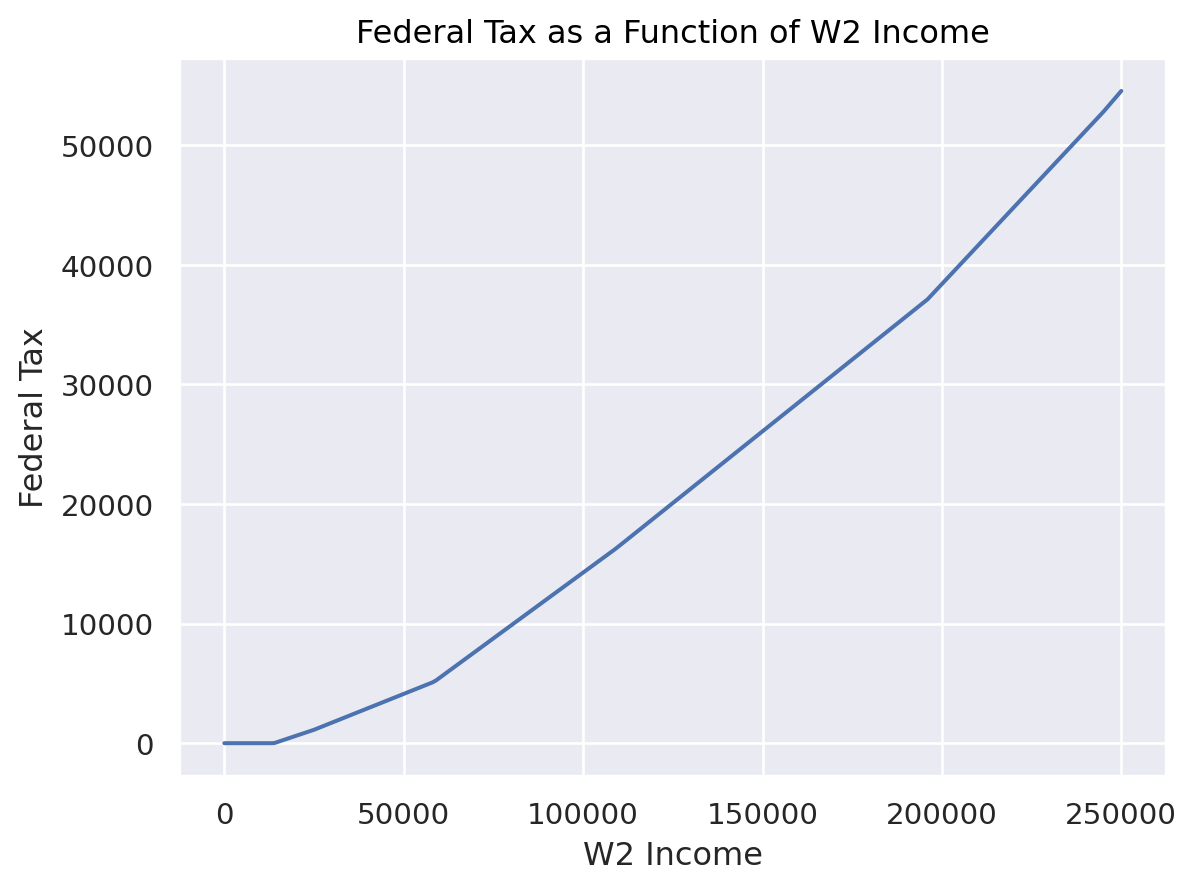

In [6]:
df = tenforty.evaluate_returns(w2_income=list(range(0, 250_001, 1_000)))

p = (
    so.Plot(df, x="w2_income", y="total_tax")
    .add(so.Line())
    .label(
        x="W2 Income", y="Federal Tax", title="Federal Tax as a Function of W2 Income"
    )
)

p

save_seaborn_objects_plot(p, "../images/example1.svg")

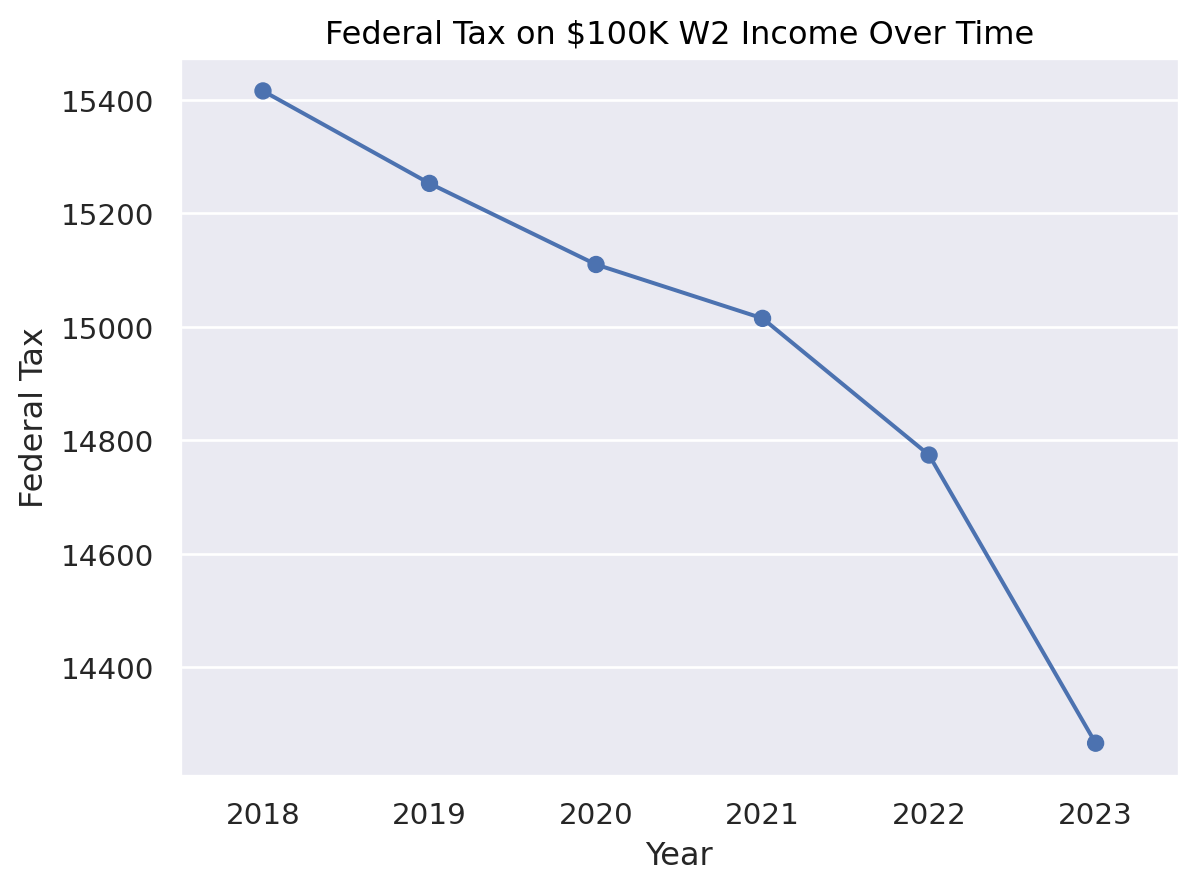

In [7]:
df = tenforty.evaluate_returns(
    year=[2018, 2019, 2020, 2021, 2022, 2023], w2_income=100_000
).astype({"year": "category"})

p = (
    so.Plot(df, x="year", y="total_tax")
    .add(so.Line())
    .add(so.Dot())
    .label(
        x="Year",
        y="Federal Tax",
        title="Federal Tax on $100K W2 Income Over Time",
    )
)

p

save_seaborn_objects_plot(p, "../images/example2.svg")

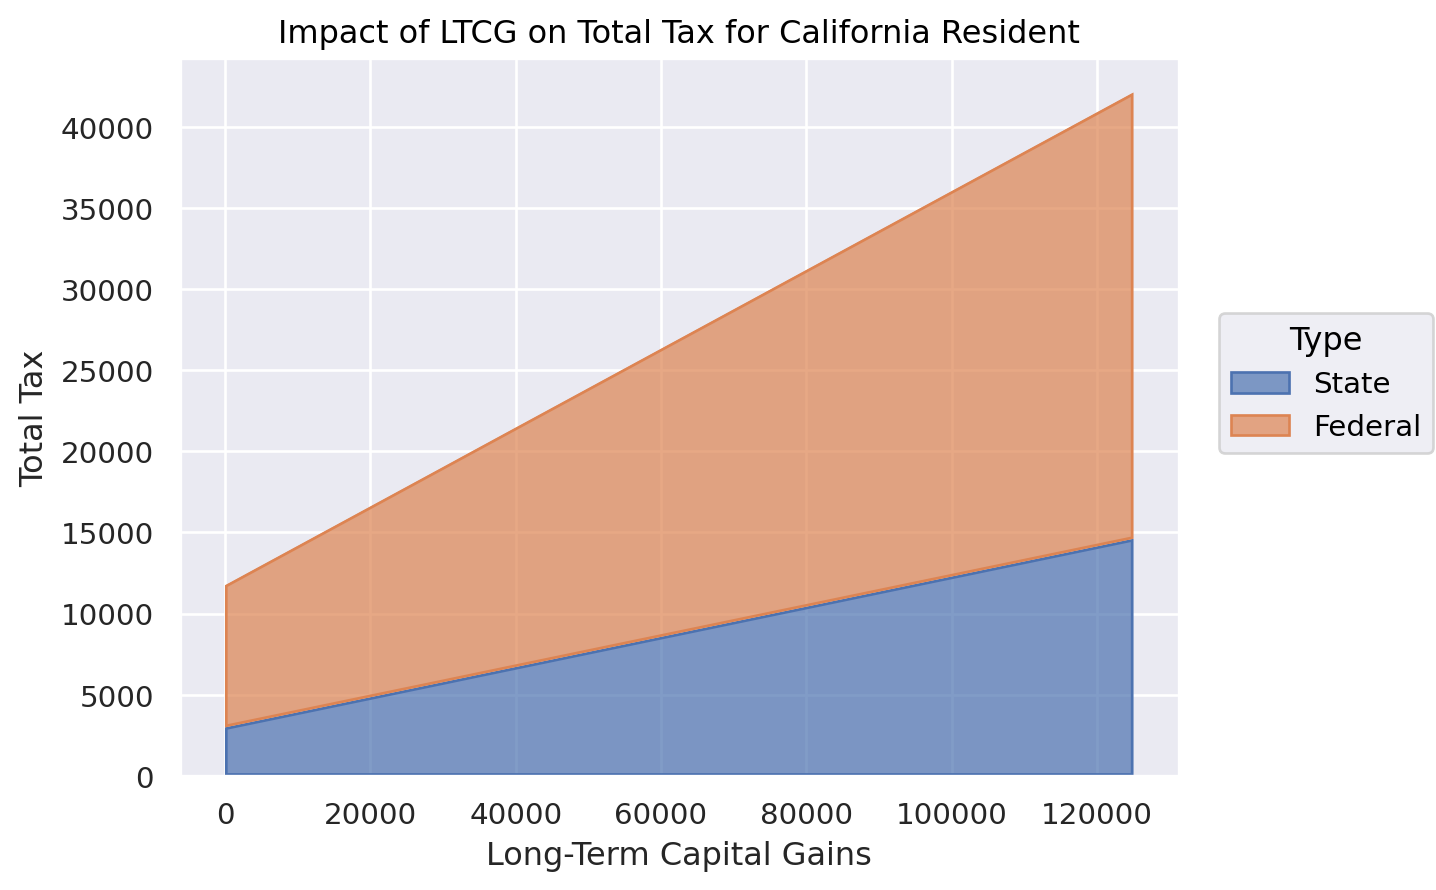

In [8]:
df = (
    tenforty.evaluate_returns(
        w2_income=75_000,
        state="CA",
        long_term_capital_gains=list(range(0, 125_001, 5000)),
    )
    .loc[:, ["long_term_capital_gains", "state_total_tax", "federal_total_tax"]]
    .melt("long_term_capital_gains", var_name="Type", value_name="tax")
    .assign(
        Type=lambda f: f.Type.map(
            {"state_total_tax": "State", "federal_total_tax": "Federal"}
        )
    )
)

p = (
    so.Plot(df, x="long_term_capital_gains", y="tax", color="Type")
    .add(so.Area(alpha=0.7), so.Stack())
    # .add(so.Dot())
    # .limit(y=(0, None))
    .label(
        x="Long-Term Capital Gains",
        y="Total Tax",
        title="Impact of LTCG on Total Tax for California Resident",
    )
)

p


save_seaborn_objects_plot(p, "../images/example3.svg")

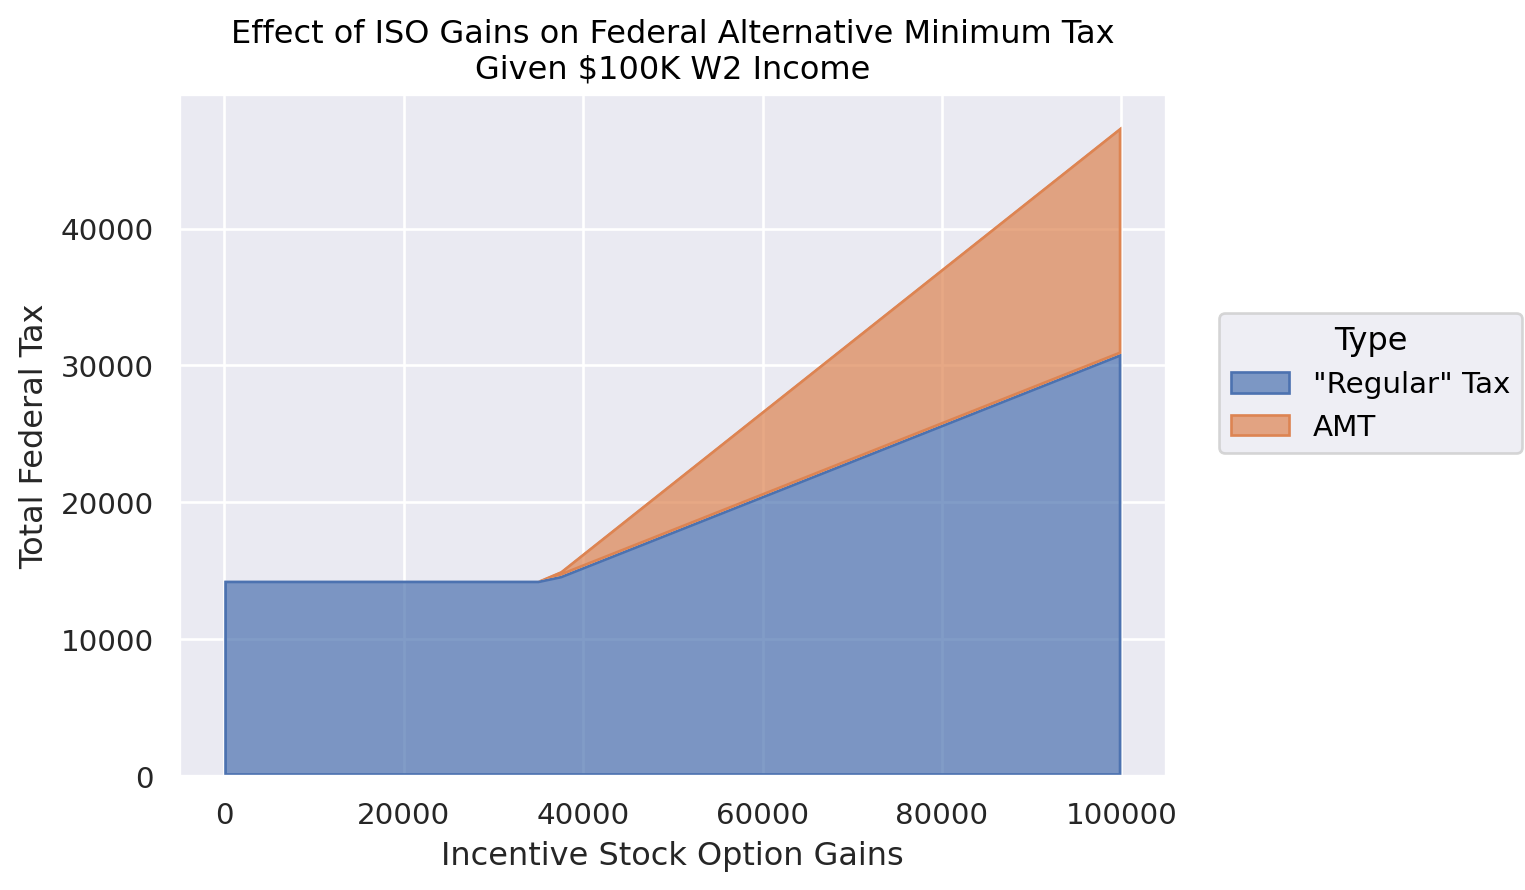

In [9]:
df = (
    tenforty.evaluate_returns(
        w2_income=100_000, incentive_stock_option_gains=list(range(0, 100_001, 2500))
    )
    .loc[:, ["incentive_stock_option_gains", "federal_total_tax", "federal_amt"]]
    .melt("incentive_stock_option_gains", var_name="Type", value_name="tax")
    .assign(
        Type=lambda f: f.Type.map(
            {"federal_amt": "AMT", "federal_total_tax": '"Regular" Tax'}
        )
    )
)

p = (
    so.Plot(df, x="incentive_stock_option_gains", y="tax", color="Type")
    .add(so.Area(alpha=0.7), so.Stack())
    .label(
        x="Incentive Stock Option Gains",
        y="Total Federal Tax",
        title="Effect of ISO Gains on Federal Alternative Minimum Tax\nGiven $100K W2 Income",
    )
)

p


save_seaborn_objects_plot(p, "../images/example4.svg")